# **Nuwan Fernando - E-news Express Project**

## Objective:

* Explore the dataset and extract insights using Exploratory Data Analysis.
* Do the users spend more time on the new landing page than the old landing page?
* Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
* Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
* Is the mean time spent on the new page same for the different language users?

## Data dictionary:

**abtest.csv** - This file contains information about vistor's relationship with the landing pages.
* user_id - This represents the user ID of the person visiting the website.
* group - This represents whether the user belongs to the first group (control) or the second group (treatment).
* landing_page - This represents whether the landing page is new or old.
* time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
* converted - This represents whether the user gets converted to a subscriber of the news portal or not.
* language_preferred - This represents the language chosen by the user to view the landing page.

## Import packages:

In [2]:
# install the scipy version 1.6.1. and restart the kernel after the successful installation
!pip install scipy==1.6.1

In [3]:
# import the scipy and check the version to be sure that the version is 1.6.1.
import scipy
scipy.__version__

'1.6.1'

In [4]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

## Import data set:

In [5]:
data=pd.read_csv("abtest.csv")

In [6]:
# copying data to another varaible to avoid any changes to original data
e_news=data.copy()

## View the first and last five rows of the dataset:

In [7]:
e_news.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [8]:
e_news.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


## Understand the shape of the data:

In [9]:
# (rows, columns)
e_news.shape

(100, 6)

* The data set has 100 rows and 6 columns.

## Check the data types of the columns for the data set:

In [10]:
e_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


## Fixing the data types:

* group, landing_page, converted, language preferred are of object type, we can change them to categories in order to save space.
* The memory usage is listed at 4.8+ KB.

In [11]:
e_news["group"]=e_news["group"].astype("category")
e_news["landing_page"]=e_news["landing_page"].astype("category")
e_news["converted"]=e_news["converted"].astype("category")
e_news["language_preferred"]=e_news["language_preferred"].astype("category")

In [12]:
e_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.5 KB


* After converting, the new memory usage is listed at 2.5 KB.

## Statistical summary of data:

In [13]:
# When using .describe, it will only show statistical values for integers and floats. 
# You would need to include categories within the parenthesis.
e_news.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


* The user_id and time_spent_on_page mean and median are approximately the same.

In [14]:
e_news.describe(include=["category"])

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,treatment,old,yes,Spanish
freq,50,50,54,34


* All columns have a count of 100.
* There are two unique items for group, landing_page, converted, and language_preferred while under languages_preferred there are three unique choices. 
* The top value for group is treatment, the most popular landing_page is old, the top converted values is yes, and the most common language_preferred is Spanish.
* The frequency of the values are around 50 where as the frequency for language_preferred is roughly a third. The is because the language_preferred has 3 unique values while the other columns carry 2 unique values.

## Check for missing values:

In [15]:
# summates all null values according to column values.
e_news.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

* No missing values are recorded

## *EDA*

## Univariate analysis:

In [16]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### user_id

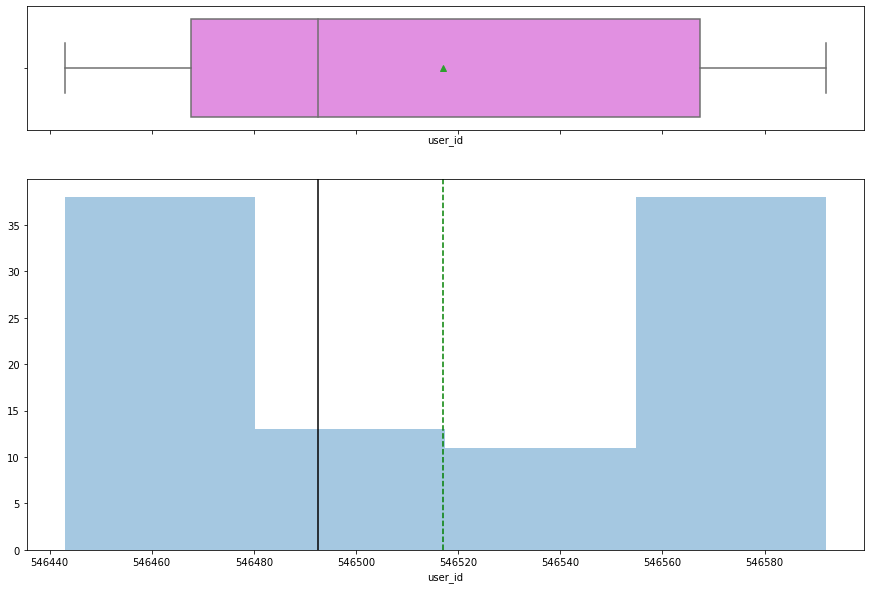

In [17]:
histogram_boxplot(e_news["user_id"])

* The distribution for user_id is slightly right skewed. 
* When looking at the histogram, the outer bins of the histogram are larger than the inner bins. This isn't anything significant since we do not know how the company distributes I.D.s to the person visiting the website.
* There are no outliers in this data.

### time_spent_on_the_page

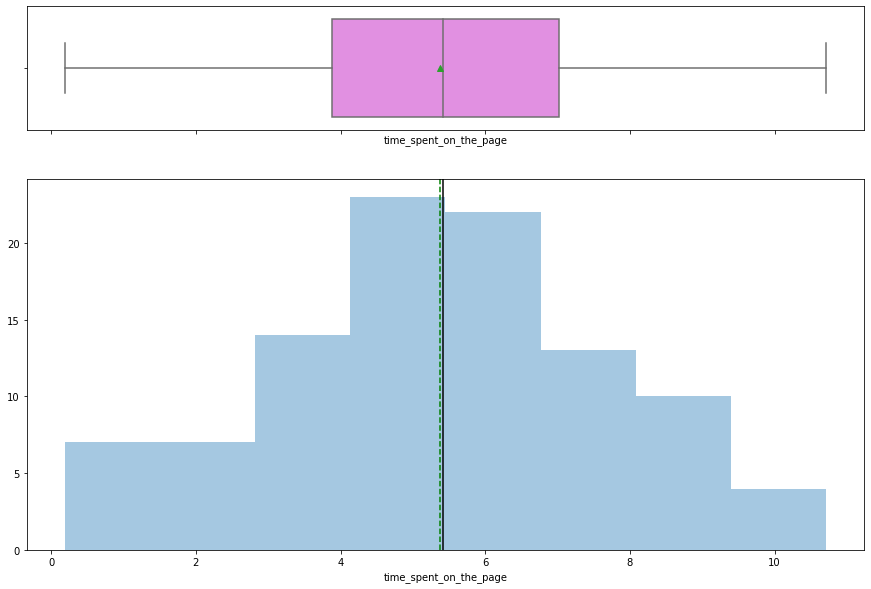

In [18]:
histogram_boxplot(e_news["time_spent_on_the_page"])

* The median and the mean are almost overlapping, showing that there is almost zero skewness.
* The box plot shows that much of the data is centered around 5 mins while the whiskers 
of the box plot show that the extremities of the data have a large range in comparison to the box.
* The data is also represented in a classic bell shaped curve, meaning this data follows a normal curve.
* There is no outliers in this data.

In [19]:
# Function to create barplots that indicate percentage for each category.
def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### group

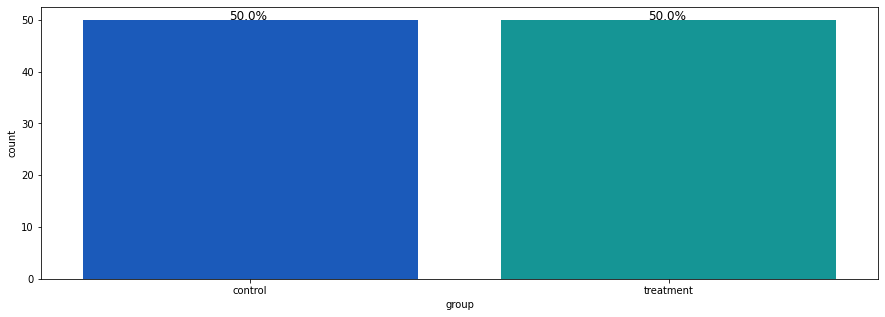

In [20]:
# count plot for categorical variables
plt.figure(figsize=(15,5))
ax = sns.countplot(e_news["group"],palette='winter')
perc_on_bar(ax,e_news["group"])

* The barplot shows a 50/50 split between the individuals that are a part of the control group and the people that
are a part of the treatment group. 
* For the 50/50 split you are able to deduce, with the sample size, that 50 individuals are in the control group and 50 individuals are in the treatment group. 
* This even split is necessary to fairly analyze the data.

### landing_page

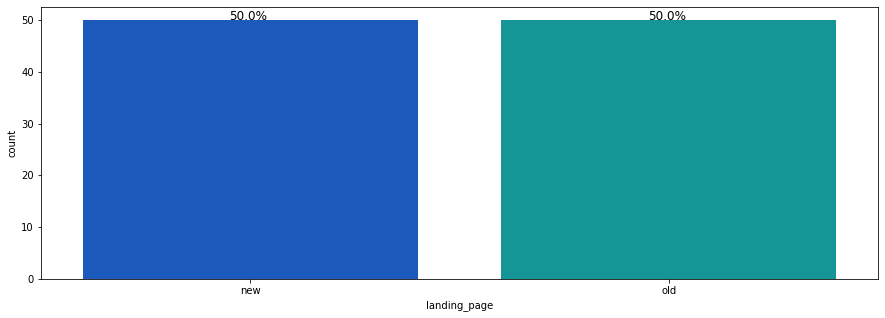

In [21]:
plt.figure(figsize=(15,5))
ax = sns.countplot(e_news["landing_page"],palette='winter')
perc_on_bar(ax,e_news["landing_page"])

* The even distribution between the new and old landing pages is due to the old landing page being served to the control group and the new landing page being served to the treatment group. 

### converted

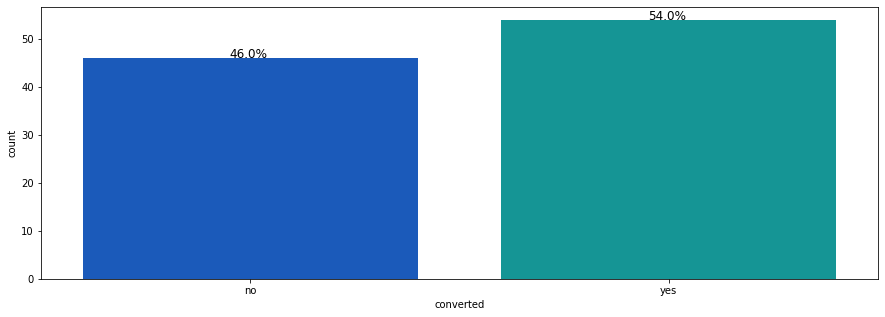

In [22]:
plt.figure(figsize=(15,5))
ax = sns.countplot(e_news["converted"],palette='winter')
perc_on_bar(ax,e_news["converted"])

* 46 percent of the individuals chose not to subscribe to the new protal.
* 54 percent of the individuals chose to subscribe to the new portal.

### language_preferred

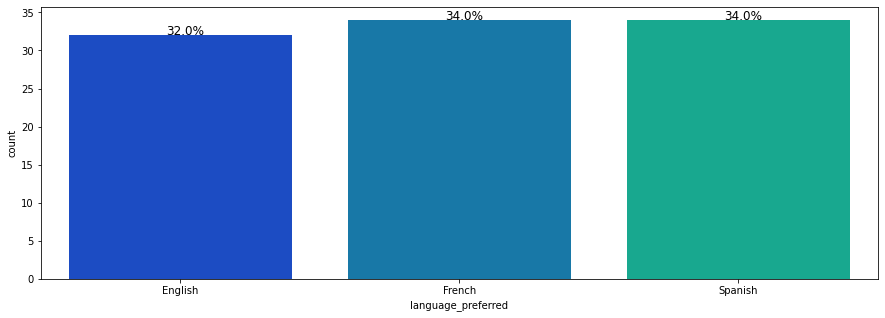

In [23]:
plt.figure(figsize=(15,5))
ax = sns.countplot(e_news["language_preferred"],palette='winter')
perc_on_bar(ax,e_news["language_preferred"])

* French and Spanish are tied for the highest frequency of languages spoken at 34 percent. 
* English follows closely behind at 32 percent.

## Bivariate and multivariate analysis

### group vs. time_spent_on_the_page

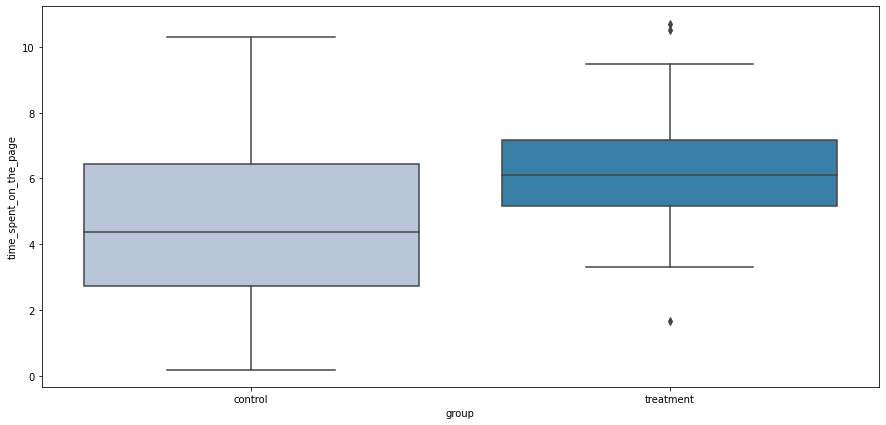

In [24]:
plt.figure(figsize=(15,7))
sns.boxplot(e_news["group"],e_news["time_spent_on_the_page"],palette="PuBu")
plt.show()

* The treatment group is concentrated around the 6.2 mins where as the control group is concentrated around 4.2 mins of time spent on the pages.
* The control group also has a larger range than the treatment group.
* The treatment group also has outliers

### language_preferred vs. time_spent_on_the_page

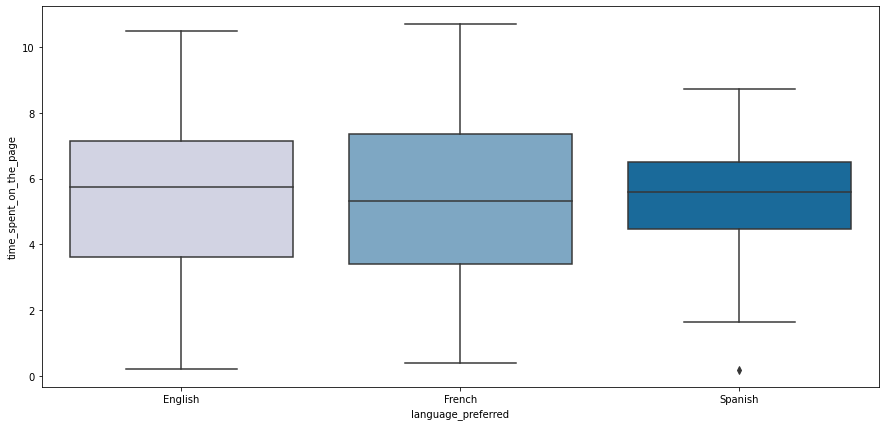

In [53]:
plt.figure(figsize=(15,7))
sns.boxplot(e_news["language_preferred"],e_news["time_spent_on_the_page"],palette="PuBu")
plt.show()

* People who spoke Spanish and French were slightly more abundant in the groups but it seems that there is more 
concentration in time spent on the landing page for the Spanish, than any other language speaker.
* French and English share similar box plots but the users that prefer French have the widest range from the 25 percent quartile to the 75 percent quartile.
* There is an outlier for the Spanish box plot.

### converted vs. time_spent_on_the_page

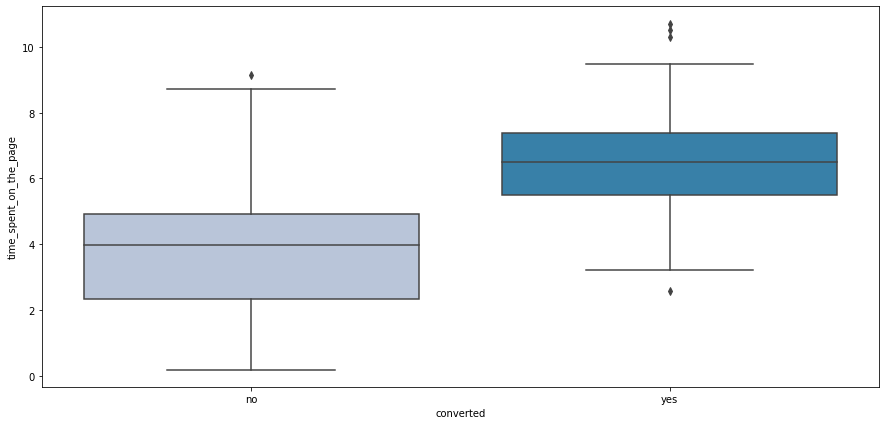

In [26]:
plt.figure(figsize=(15,7))
sns.boxplot(e_news["converted"],e_news["time_spent_on_the_page"],palette="PuBu")
plt.show()

* On average new subscribers spend more time on the page than those that did not subscribe.
* There are more outliers for the converted group than for the non-converts.

### group vs. converted

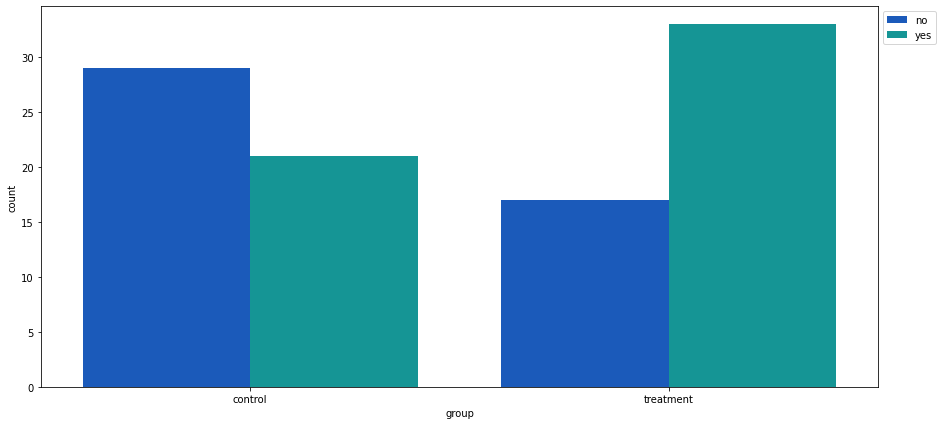

In [27]:
plt.figure(figsize=(15,7))
sns.countplot(e_news["group"],hue=e_news["converted"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* The data shows that there are more converts for the treatment group than the control group.
* The separation between the counts is greater for the treatment group.

### group vs. language_preferred

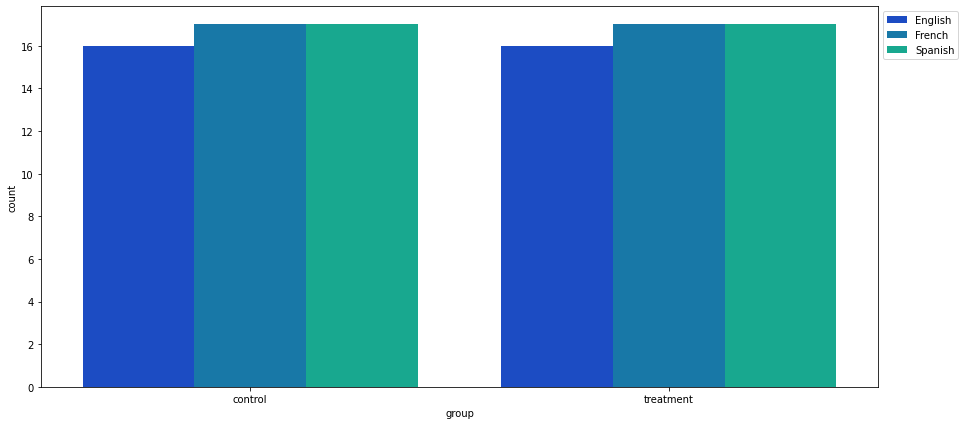

In [28]:
plt.figure(figsize=(15,7))
sns.countplot(e_news["group"],hue=e_news["language_preferred"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Language preference is equal between both groups. 
* English is the least preferred while Spanish and French are tied.

### converted vs. language preferred

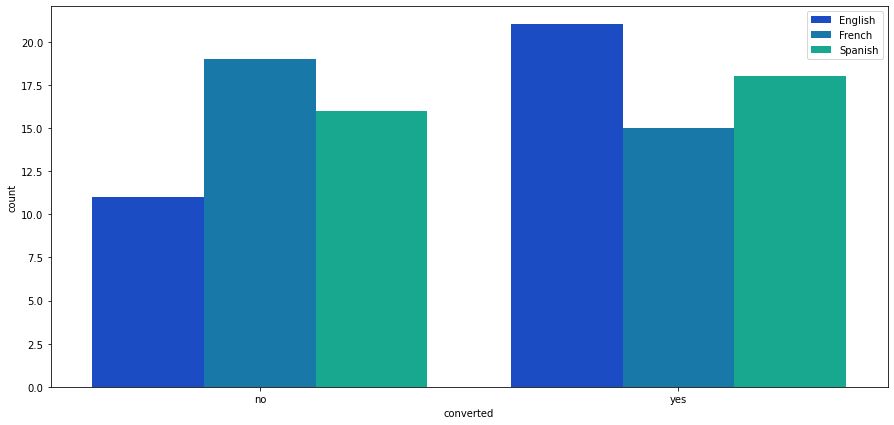

In [29]:
plt.figure(figsize=(15,7))
sns.countplot(e_news["converted"],hue=e_news["language_preferred"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* The English speakers subscribed the most.
* The French rejected the subscription the most.

### group vs. time_spent_on_the_page vs. converted

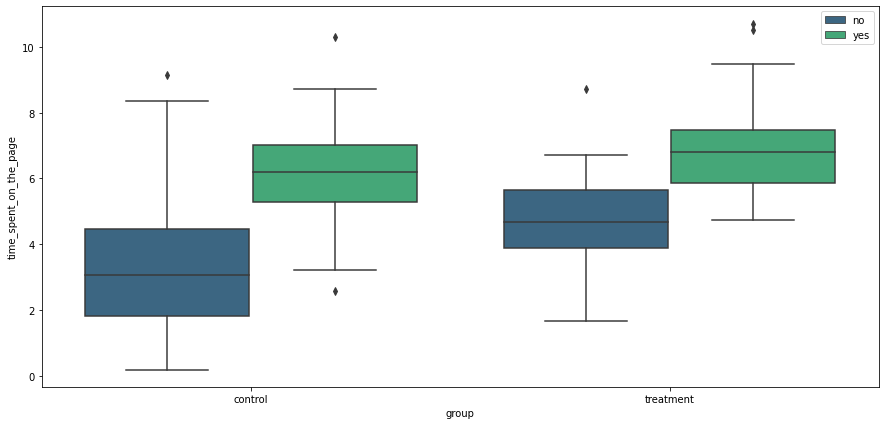

In [30]:
plt.figure(figsize=(15,7))
sns.boxplot(e_news["group"],e_news["time_spent_on_the_page"],hue=e_news["converted"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* The average subscriptions per min spent ont he page are higher than the rejections for both groups.
* Each plot has outliers

### language_preferred vs. time_spent_on_the_page vs. converted

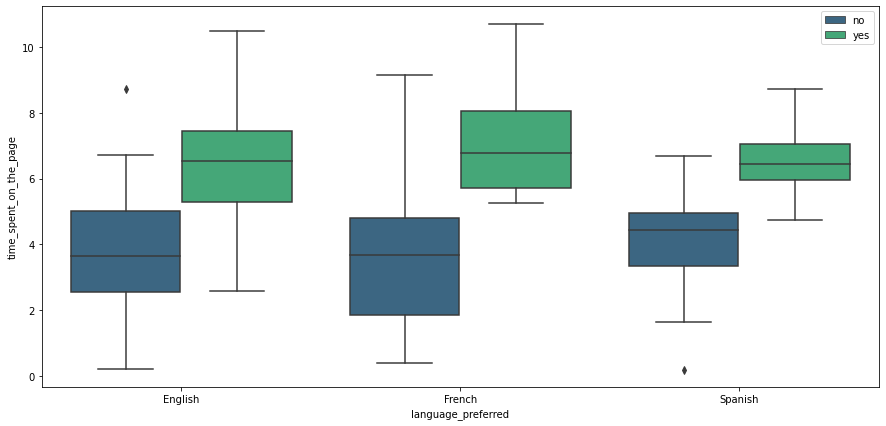

In [31]:
plt.figure(figsize=(15,7))
sns.boxplot(e_news["language_preferred"],e_news["time_spent_on_the_page"],hue=e_news["converted"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* The Spanish have a higher concentration of time spent on a page than any other language preference speaker.

### Grouping data according to treatment group

In [32]:
# grouping all values for treatment
e_news[e_news["group"]=="treatment"].describe(include="all")

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,50.00000,50,50,50.000000,50,50
unique,NaN,1,1,NaN,2,3
top,NaN,treatment,new,NaN,yes,Spanish
freq,NaN,50,50,NaN,33,17
mean,546467.50000,NaN,NaN,6.223200,NaN,NaN
std,14.57738,NaN,NaN,1.817031,NaN,NaN
min,546443.00000,NaN,NaN,1.650000,NaN,NaN
25%,546455.25000,NaN,NaN,5.175000,NaN,NaN
50%,546467.50000,NaN,NaN,6.105000,NaN,NaN
75%,546479.75000,NaN,NaN,7.160000,NaN,NaN


* The most interesting attribute in the chart is time_spent_on_the_page. It has numerical values that can be used to compare with the control group.
* The mean for time_spent_on_the_page is 6.223 mins.

### Grouping data according to control group

In [33]:
# grouping all values for control
e_news[e_news["group"]=="control"].describe(include="all")

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,50.00000,50,50,50.000000,50,50
unique,NaN,1,1,NaN,2,3
top,NaN,control,old,NaN,no,Spanish
freq,NaN,50,50,NaN,29,17
mean,546566.50000,NaN,NaN,4.532400,NaN,NaN
std,17.67767,NaN,NaN,2.581975,NaN,NaN
min,546493.00000,NaN,NaN,0.190000,NaN,NaN
25%,546555.25000,NaN,NaN,2.720000,NaN,NaN
50%,546567.50000,NaN,NaN,4.380000,NaN,NaN
75%,546579.75000,NaN,NaN,6.442500,NaN,NaN


* Both the control and the treatment groups show that Spanish is the most preferred language, but French is also tied with Spanish.
* The mean for the control group is 4.532mins. 

## Statistical analysis

### *Do the users spend more time on the new landing page than the old landing page?*

In [34]:
# mu_1 is equal to the time spent on the new landing page.
# mu_2 is equal to the time spent on the old landing page.

significance level: 
0.05

Null Hypothesis:
>$H_0:\mu_1=\mu_2$

Alternate Hypothesis:
>$H_a:\mu_1>\mu_2$

In [35]:
group_mean=e_news.groupby("group").agg({"time_spent_on_the_page" : np.mean})
print(group_mean)

           time_spent_on_the_page
group                            
control                    4.5324
treatment                  6.2232


In [36]:
group_std=e_news.groupby("group").agg({"time_spent_on_the_page" : np.std})
print(group_std)

           time_spent_on_the_page
group                            
control                  2.581975
treatment                1.817031


In [37]:
print('time spent on the page by control group is: ' +  str(round(group_mean.loc['control', 'time_spent_on_the_page'],4)))
print('time spent on the page by treatment group is: ' +  str(round(group_mean.loc['treatment', 'time_spent_on_the_page'],4)))
print('time spent on the page by control group is: ' +  str(round(group_std.loc['control', 'time_spent_on_the_page'],4)))
print('time spent on the page by treatment group is: ' +  str(round(group_std.loc['treatment', 'time_spent_on_the_page'],4)))

time spent on the page by control group is: 4.5324
time spent on the page by treatment group is: 6.2232
time spent on the page by control group is: 2.582
time spent on the page by treatment group is: 1.817


### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the time_spent_on_the_page values is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.


### Find p-value

In [38]:
old = e_news.query('group == "control"')['time_spent_on_the_page']
new = e_news.query('group == "treatment"')['time_spent_on_the_page']

#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(new, old, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


* Two Independent Sample T-test for Equality of Means - Unequal Std Dev was used to produce a p-value
* A p-value less than the significance level of 0.05 indicates that the Null Hypothesis should be rejected and the Alternative Hypothesis should be accepted.
* This means that users do spend more time on the new landing page than the old landing page.

### *Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?*

In [39]:
# p_1 is the conversion rate for the new page
# p_2 is the conversion rate for the old page

significance level: 
0.05

Null Hypothesis:
>$H_0:p_1=p_2$

Alternate Hypothesis:
>$H_a:p_1>p_2$

In [40]:
# gives a percentage for the values
e_news.query('group == "control"')['converted'].value_counts('yes')

no     0.58
yes    0.42
Name: converted, dtype: float64

In [41]:
# calculates the count of the values that are a part of the control group
control_no=50*.58
control_yes=50*.42
print('no count is: ' + str(round(control_no)))
print('yes count is: ' + str(round(control_yes)))

no count is: 29
yes count is: 21


In [42]:
# gives a percentage for the values
e_news.query('group == "treatment"')['converted'].value_counts('yes')

yes    0.66
no     0.34
Name: converted, dtype: float64

In [43]:
# calculates the count of the values that are a part of the treatment group
treatment_yes=50*.66
treatment_no=50*.34
print('yes count is: ' + str(round(treatment_yes)))
print('no count is: ' + str(round(treatment_no)))

yes count is: 33
no count is: 17


### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, the new page conversion rate is either greater or not.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.

### Find p-value

In [44]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of defective items
defect_count = np.array([21, 33])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(defect_count, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.016052616408112556


* Two Proportion Z-test was used to produce a p-value
* A p-value less than the significance level of 0.05 indicates that the Null Hypothesis should be rejected and the Alternative Hypothesis should be accepted.
* This means that the conversion rate for the new page is greater than the old page.

### *Does the converted status depend on the preferred language?*

significance level: 0.05

>$H_0:$ Converted status is independent of preferred language.

against the alternate hypothesis

>$H_a:$  Converted status depends on preferred language.

### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

In [45]:
# creates a crosstable that compares converted values by languages preferred
new_table=pd.crosstab(e_news['converted'],e_news['language_preferred'])
new_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [46]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(new_table)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


* Chi-Square Test for Independence was used to find the p-value
* A p-value more than the significance level of 0.05 indicates that the Null Hypothesis should be accepted and 
and the Alternative Hypothesis should be rejected.
* This means that the converted status is independent of preferred language.

### Is the mean time spent on the new page same for the different language users?

significance level: 0.05

We will test the null hypothesis

>$H_0: \mu_1 \neq \mu_2 \neq \mu_3$

against the alternative hypothesis

>$H_a: $ At least one mean time spent on the new page will be the same for multiple languages

In [47]:
# get the count for languages preferred
e_news['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

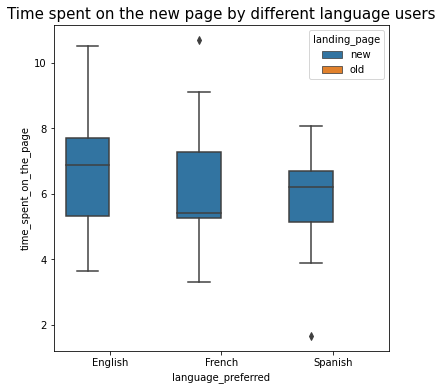

In [48]:
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = e_news[e_news["landing_page"].isin(["new"])], hue = 'landing_page')
a.set_title("Time spent on the new page by different language users", fontsize=15)
plt.show()

* According to the graph Spanish had a more concentrated time frame for viewing the new page.
* English had the greatest range.

Now, the normality and equality of variance assumptions need to be checked.

For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on new page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Time spent on new page does not follow a normal distribution

In [49]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(e_news['time_spent_on_the_page'][e_news['landing_page']=='new']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


* passes normality test

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [50]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene(e_news['time_spent_on_the_page'][e_news['language_preferred']=="English"][e_news['landing_page']=='new'], 
                                   e_news['time_spent_on_the_page'][e_news['language_preferred']=="French"][e_news['landing_page']=='new'], 
                                   e_news['time_spent_on_the_page'][e_news['language_preferred']=="Spanish"][e_news['landing_page']=='new'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


* passes homogeneity of variance test

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

### Find the p-value

In [51]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(e_news['time_spent_on_the_page'][e_news['language_preferred']=="English"][e_news['landing_page']=='new'], 
                                   e_news['time_spent_on_the_page'][e_news['language_preferred']=="French"][e_news['landing_page']=='new'], 
                                   e_news['time_spent_on_the_page'][e_news['language_preferred']=="Spanish"][e_news['landing_page']=='new'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


* An ANOVA test was conducted to produce the p-value.
* A p-value more than the significance level of 0.05 indicates that the Null Hypothesis should be accepted and 
and the Alternative Hypothesis should be rejected.
* This means that time spent for the new page is different than that for laguages preferred.

## Conclusions: 

### Key insights

#### Control group - old page
* Had a larger overall range in time spent on the page, but the range from 25% to 75% yielded a lower mean and median.
* The larger range contributed to the control group having a larger std.
* Using statistical analysis we found that conversion rates were lower than the treatment group.
* The conversions were independent of the languages spoken. All preferred languages were nearly identical, with the the treatment group mirroring the control group.

#### Treatment group - new page
* Had a smaller overall range in time spent on the page, but the range from 25% to 75% yielded a larger mean and median than the control group.
* The smaller range contributed to the control group having a smaller std.
* Statistical analysis shows that conversion rates were higher than the control group.
* The abtest proved that the new landing page for E-news is much more captivating than the old page.

### Business recommendations

* Choose the new page for the website since it has been shown to be more profitable.
* Collect age values to create a more comprehensive analysis. The data given, and the analysis conducted only shows which page is more profitable but doesn't show why it is more profitible. 
* Could customize to allow Spanish dictation which could bring in more people. Time spent on the page could be a good or bad. For instance, time spent on a page could be positive and promote engagement but it could also signify complexity which could become a deterrent for potential subscribers.